# Grafo del experimtento.
Primero, importamos las librerías

In [12]:
import math

import networkx as nx
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib import pyplot as plt

Leemos la tabla de datos, y la imprimimos

In [13]:
# Use pandas to read the data from the csv file.
df = pd.read_csv('nodos.csv')
# Create a dictionary with the data from the csv file.
data = {'key': df['key'], 'x': df['x'], 'y': df['y'], 'cantidad': df['cantidad'], 'mineral': df['Mineral']}
df

,key,x,y,cantidad,Mineral
0,A,9083,6551,2,Au
1,B,9008,6504,2,Au
2,C,8950,6477,2,Au
3,D,8910,6415,2,Au
4,E,8881,6404,2,Au
5,F,8833,6407,3,Au
6,G,9123,6314,3,Fe
7,H,9162,6310,2,Fe
8,I,9084,6246,3,Fe
9,J,9146,6231,2,Fe


Creamos un grafo con las aristas, y pesos

In [14]:
G = nx.path_graph(0)


def distance(x1, y1, x2, y2):
    '''Calcula la distancia entre dos puntos'''
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


edges = {
    (i, j, distance(x1, y1, x2, y2))
    for i, x1, y1 in zip(data['key'], data['x'], data['y'])
    for j, x2, y2 in zip(data['key'], data['x'], data['y']) if i != j
}

G.add_weighted_edges_from(edges)  # Agrega los vertices a partir de un diccionario de tuplas con la forma (x,y,peso)
nodes = {
    i: (j, k)
    for i, j, k in zip(data['key'], data['x'], data['y'])
}


def to_linked_list(p):
    '''Convierte un conjunto de nodos en tuplas a una reperesentación en listas enlazadas'''
    return {i: sorted([(j, k) for l, j, k in p if i == l]) for i in data['key']}


edges2 = to_linked_list(edges)
#G.add_weighted_edges_from({(x, y, z) for x in edges2.keys() for y, z in edges2[x]}) # -> agrega a partir de una lista enlazada simple

In [48]:
import numpy as np

pesos = [round(distance(x1, y1, x2, y2)) for i, x1, y1 in zip(data['key'], data['x'], data['y'])
         for j, x2, y2 in zip(data['key'], data['x'], data['y'])]

pp = np.matrix(pesos)
pesos = pp.reshape(20, 20)
print(pesos.getA1())

[  0  89 152 220 250 289 240 254 305 326 372 376 367 290 446 428 489 578
 635 508  89   0  64 132 162 200 222 248 269 306 352 319 303 221 368 348
 407 496 554 432 152  64   0  74 100 136 238 270 267 315 359 296 273 191
 321 298 354 443 501 386 220 132  74   0  31  77 236 273 243 299 340 247
 218 139 250 226 280 370 428 315 250 162 100  31   0  48 258 296 257 316
 355 249 216 143 233 207 258 347 406 298 289 200 136  77  48   0 305 343
 298 359 396 277 241 178 234 204 247 334 391 297 240 222 238 236 258 305
   0  39  78  86 132 179 194 161 310 311 371 446 495 356 254 248 270 273
 296 343  39   0 101  81 122 205 225 199 344 346 406 478 525 387 305 269
 267 243 257 298  78 101   0  64  98 105 128 127 248 255 312 380 426 287
 326 306 315 299 316 359  86  81  64   0  46 154 185 190 305 314 369 432
 474 337 372 352 359 340 355 396 132 122  98  46   0 164 201 222 316 330
 381 436 474 341 376 319 296 247 249 277 179 205 105 154 164   0  41 108
 152 167 217 278 322 184 367 303 273 218 216 241 19

Dibujamos el grafo

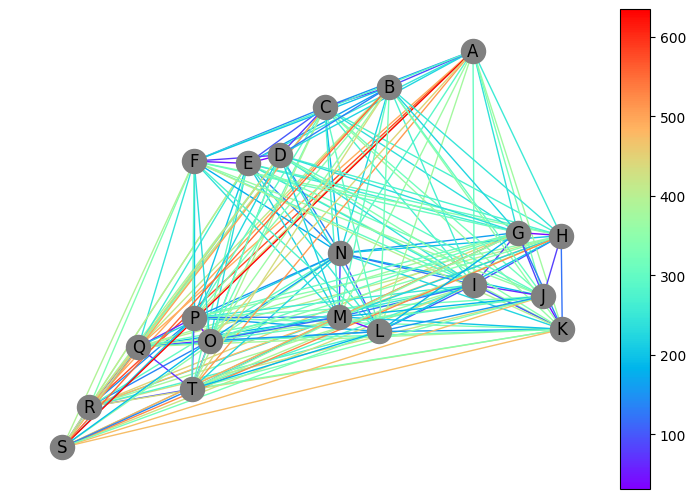

In [16]:
#Creamos el grafo
colormap = plt.cm.rainbow
nx.draw(G, nodes, edge_color=[G[u][v]['weight'] for (u, v) in G.edges()],
        edge_cmap=colormap, with_labels=True, node_color="gray")
# Creamos la barra de color
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
pesosw = list([G[u][v]['weight'] for (u, v) in G.edges()])
norm = mpl.colors.Normalize(vmin=min(pesosw), vmax=max(pesosw))
cb1 = mpl.colorbar.ColorbarBase(ax=ax_cb, cmap=colormap, norm=norm, orientation='vertical')
plt.gcf().add_axes(ax_cb)
plt.savefig("original.png", transparent=True, dpi=150)
plt.show()

In [17]:
print("El arbol completo tiene " + str(len(G.edges)) + " aristas\n")


El arbol completo tiene 190 aristas



In [18]:
print(list(G.neighbors('A')))

['Q', 'K', 'T', 'N', 'D', 'G', 'R', 'B', 'C', 'S', 'I', 'H', 'E', 'M', 'O', 'L', 'J', 'P', 'F']


Copiamos el grafo a otro, y le reducimos el número de aristas, a las aristas con un peso inferior a 200

Por lo tanto, podemos calcular en número de aritas: